<a href="https://colab.research.google.com/github/fzassumpcao/image-classifier/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
#Look at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#Look at first image as array
index = 403
x_train[index]

array([[[198, 153, 114],
        [195, 151, 112],
        [195, 151, 112],
        ...,
        [204, 150, 111],
        [206, 152, 113],
        [206, 152, 113]],

       [[199, 151, 112],
        [197, 151, 112],
        [198, 151, 112],
        ...,
        [202, 151, 110],
        [206, 154, 114],
        [208, 157, 116]],

       [[198, 148, 110],
        [194, 144, 107],
        [194, 145, 107],
        ...,
        [196, 146, 105],
        [198, 149, 108],
        [200, 151, 110]],

       ...,

       [[195, 135,  92],
        [201, 142, 100],
        [202, 144, 102],
        ...,
        [207, 148, 104],
        [205, 146, 102],
        [200, 141,  97]],

       [[196, 137,  94],
        [198, 141,  98],
        [201, 143, 100],
        ...,
        [209, 152, 110],
        [208, 151, 109],
        [201, 145, 102]],

       [[194, 135,  93],
        [189, 132,  90],
        [188, 132,  91],
        ...,
        [197, 140,  99],
        [200, 143, 102],
        [194, 138,  96]]

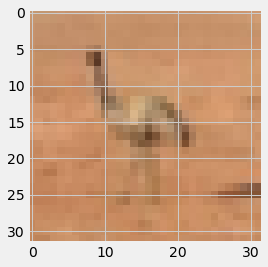

In [ ]:
#Show image as picture
img = plt.imshow(x_train[index])

In [ ]:
#image label
print('Image label is:', y_train[index])

Image label is: [2]


In [ ]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print image class
print('Image class is:', classification[y_train[index][0]])

Image class is: bird


In [ ]:
#Convert labels into set of 10 numbers to put into NN
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#Print new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print new label of image above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

array([[[0.77647059, 0.6       , 0.44705882],
        [0.76470588, 0.59215686, 0.43921569],
        [0.76470588, 0.59215686, 0.43921569],
        ...,
        [0.8       , 0.58823529, 0.43529412],
        [0.80784314, 0.59607843, 0.44313725],
        [0.80784314, 0.59607843, 0.44313725]],

       [[0.78039216, 0.59215686, 0.43921569],
        [0.77254902, 0.59215686, 0.43921569],
        [0.77647059, 0.59215686, 0.43921569],
        ...,
        [0.79215686, 0.59215686, 0.43137255],
        [0.80784314, 0.60392157, 0.44705882],
        [0.81568627, 0.61568627, 0.45490196]],

       [[0.77647059, 0.58039216, 0.43137255],
        [0.76078431, 0.56470588, 0.41960784],
        [0.76078431, 0.56862745, 0.41960784],
        ...,
        [0.76862745, 0.57254902, 0.41176471],
        [0.77647059, 0.58431373, 0.42352941],
        [0.78431373, 0.59215686, 0.43137255]],

       ...,

       [[0.76470588, 0.52941176, 0.36078431],
        [0.78823529, 0.55686275, 0.39215686],
        [0.79215686, 0

In [ ]:
#Create model's architecture
model = Sequential()

#Add first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add second layer
model.add(Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 53s 337ms/step - loss: 1.8221 - accuracy: 0.3146 - val_loss: 1.5159 - val_accuracy: 0.4383
Epoch 2/10
157/157 [==============================] - 53s 335ms/step - loss: 1.4485 - accuracy: 0.4678 - val_loss: 1.3359 - val_accuracy: 0.5188
Epoch 3/10
157/157 [==============================] - 53s 335ms/step - loss: 1.2981 - accuracy: 0.5299 - val_loss: 1.2309 - val_accuracy: 0.5575
Epoch 4/10
157/157 [==============================] - 53s 335ms/step - loss: 1.1947 - accuracy: 0.5724 - val_loss: 1.1666 - val_accuracy: 0.5765
Epoch 5/10
157/157 [==============================] - 53s 335ms/step - loss: 1.1079 - accuracy: 0.6061 - val_loss: 1.0924 - val_accuracy: 0.6042
Epoch 6/10
157/157 [==============================] - 53s 335ms/step - loss: 1.0320 - accuracy: 0.6352 - val_loss: 1.0125 - val_accuracy: 0.6460
Epoch 7/10
157/157 [==============================] - 53s 336ms/step - loss: 0.9618 - accuracy: 0.6594 - val_loss: 0.9869 - val_ac

In [ ]:
#Evaluate the model using test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 1.0168 - accuracy: 0.6541


0.6541000008583069

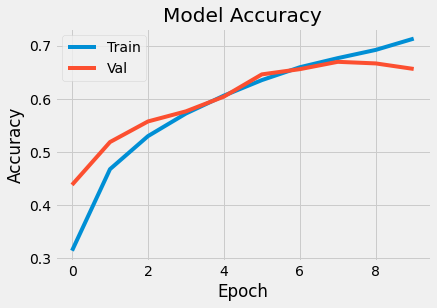

In [ ]:
#Visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

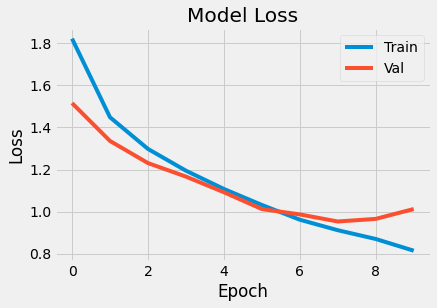

In [ ]:
#Visualize model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Test the model with example
from google.colab import files
uploaded = files.upload()

Saving dogfrog.jpg to dogfrog.jpg


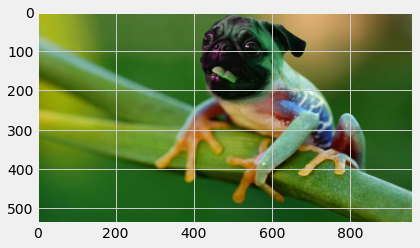

In [ ]:
#show image
new_image = plt.imread('dogfrog.jpg')
img = plt.imshow(new_image)

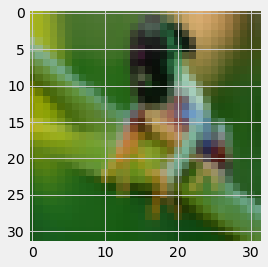

In [ ]:
#Resize image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
#Get prediction
predictions = model.predict(np.array([resized_image]))

#Show
predictions

array([[4.89419745e-03, 1.21551042e-04, 8.23267043e-01, 1.22076962e-02,
        3.70276980e-02, 1.37265623e-02, 1.06060304e-01, 1.05556252e-03,
        1.31995720e-03, 3.19354411e-04]], dtype=float32)

In [ ]:
#Sort predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show
print(list_index)

[2, 6, 4, 5, 3, 0, 8, 7, 9, 1]


In [ ]:
#Print first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2),'%')

bird : 82.33 %
frog : 10.61 %
deer : 3.7 %
dog : 1.37 %
cat : 1.22 %
